In [3]:
from __future__ import division
import sys
import random
import copy
import math
import json

import numpy as np
import pandas as pd
import scipy


%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl

import seaborn as sns

sys.path.append("../resources/")
import sct_py3
sns.set_style("ticks")
sns.set_context("talk")

output_dir = "out/"
output_suffix = ""
output_formats = [".png", ".pdf"]


mpl.rc('savefig', dpi=300)

def save_figure(fig, name):
    for output_format in output_formats:
        fig.savefig(output_dir + "/" + name + output_suffix + output_format)
    return None

mpl.rc('savefig', dpi=300)

pd.options.mode.chained_assignment = None  # default='warn'


/Users/colleenmclaughlin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# start with comparing ORN neuron nuclei and cells

These data have adult nsyb>unc84-GFP nuclei, 24h APF elav>unc84-GFP nuclei; 24h APF elav>mcd8-GFP cells (excluding auditory neuron cluster)

In [4]:
#load raw reads numbers
df = pd.read_csv("../data/Adult_24_reads_notxformed.tab.gz", sep="\t", header=0, index_col=0)  
df.shape

(9190, 17473)

In [5]:
df_all_ORN = df.T

In [6]:
df_all_ORN.shape

(17473, 9190)

In [7]:
df_libs = pd.read_csv('../data/PN_ORN_libs_CNM.csv', sep=",", header=0, index_col=0)

In [8]:
names_ORN = []
with open ("../resources/names_hq_24h_adult.txt") as f:
    for line in f:
        names_ORN.append(line.rstrip())   
    
names_24h_nuclei = []
with open ('../resources/names_24h_nuclei.txt') as c:
    for line in c:
        names_24h_nuclei.append(line.rstrip())
        
names_24h_cells = []
with open ('../resources/1198_ORNs_hq_24h.txt') as c:
    for line in c:
        names_24h_cells.append(line.rstrip())        
         

In [9]:
# Get names of adult ORN nuclei
selector7 = (df_libs["genotype"] == "ORNnuclei_adult_nSybUNC84GFP_P1") 
selector8 = (df_libs["genotype"] == "ORNnuclei_adult_nSybUNC84GFP_P2") 
selector9 = (df_libs["genotype"] == "ORNnuclei_adult_nSybUNC84GFP_P3") 
selector10 = (df_libs["genotype"] == "ORNnuclei_adult_nSybUNC84GFP_P5") 
selector11 = (df_libs["genotype"] == "ORNnuclei_adult_nSybUNC84GFP_P6") 
selector12 = (df_libs["genotype"] == "ORNnuclei_adult_nSybUNC84GFP_P7") 
selector13 = (df_libs["genotype"] == "ORNnuclei_adult_nSybUNC84GFP_P8") 
selector14 = (df_libs["genotype"] == "ORNnuclei_adult_nSybUNC84GFP_P9") 
selector15 = (df_libs["genotype"] == "ORNnuclei_adult_nSybUNC84GFP_P10") 


ORNs_adult = [x for x in list(df_all_ORN.columns) if ((x in df_libs.loc[selector7].index) 
                      or (x in df_libs.loc[selector8].index) 
                      or (x in df_libs.loc[selector9].index)
                      or (x in df_libs.loc[selector10].index)
                      or (x in df_libs.loc[selector11].index)
                      or (x in df_libs.loc[selector12].index)
                      or (x in df_libs.loc[selector13].index)
                      or (x in df_libs.loc[selector14].index)
                      or (x in df_libs.loc[selector15].index))
                      and  x in names_ORN]



print('adult ORNs:'), len(ORNs_adult)

adult ORNs:


(None, 1690)

In [10]:
df_adult_nuclei = df_all_ORN[list(ORNs_adult)]
df_adult_nuclei.shape

(17473, 1690)

In [11]:
# Get names of 24h nuclei
selector0 = (df_libs["genotype"] == "ORNnuclei_24h_ElavUNC84GFP_P1") 
selector1 = (df_libs["genotype"] == "ORNnuclei_24h_AM29UNC84GFP_P1")

ORNs_24h_nuclei = [x for x in list(df_all_ORN.columns) if ((x in df_libs.loc[selector0].index)
                      or (x in df_libs.loc[selector1].index))
                      and x in names_24h_nuclei]
print ("24h_nuclei"), len(ORNs_24h_nuclei)


24h_nuclei


(None, 266)

In [12]:
df_24h_nuclei =  df_all_ORN[list(ORNs_24h_nuclei)]
df_24h_nuclei.shape

(17473, 266)

In [13]:
# Get names of 24h cells
selector0 = (df_libs["label"] == "Elav_24h_ORN_P1") 
selector1 = (df_libs["label"] == "Elav_24h_ORN_P2")
selector2 = (df_libs["label"] == "Elav_24h_ORN_P3")
selector3 = (df_libs["label"] == "Elav_24h_ORN_P4")
selector4 = (df_libs["label"] == "Elav_24h_ORN_P5")
selector5 = (df_libs["label"] == "Elav_24h_ORN_P6")
selector6 = (df_libs["label"] == "Elav_24h_ORN_P7")
ORNs_24h = [x for x in list(df_all_ORN.columns) if ((x in df_libs.loc[selector0].index) 
                      or (x in df_libs.loc[selector1].index) 
                      or (x in df_libs.loc[selector2].index)
                      or (x in df_libs.loc[selector3].index)
                      or (x in df_libs.loc[selector4].index)
                      or (x in df_libs.loc[selector5].index)
                      or (x in df_libs.loc[selector6].index))
                      and x in names_24h_cells]
print ("Elav_cells_24h:"), len(ORNs_24h)

Elav_cells_24h:


(None, 1198)

In [14]:
df_24h_cells = df_all_ORN[list(ORNs_24h)]
df_24h_cells.shape

(17473, 1198)

In [15]:
df_24h_nuclei.tail()

,ORNnuclei_24h_ElavUNC84GFP_P1_A10,ORNnuclei_24h_ElavUNC84GFP_P1_A11,ORNnuclei_24h_ElavUNC84GFP_P1_A12,ORNnuclei_24h_ElavUNC84GFP_P1_A14,ORNnuclei_24h_ElavUNC84GFP_P1_A15,ORNnuclei_24h_ElavUNC84GFP_P1_A16,ORNnuclei_24h_ElavUNC84GFP_P1_A17,ORNnuclei_24h_ElavUNC84GFP_P1_A18,ORNnuclei_24h_ElavUNC84GFP_P1_A19,ORNnuclei_24h_ElavUNC84GFP_P1_A22,...,ORNnuclei_24h_AM29UNC84GFP_P1_O19,ORNnuclei_24h_AM29UNC84GFP_P1_O22,ORNnuclei_24h_AM29UNC84GFP_P1_O24,ORNnuclei_24h_AM29UNC84GFP_P1_O2,ORNnuclei_24h_AM29UNC84GFP_P1_O7,ORNnuclei_24h_AM29UNC84GFP_P1_P12,ORNnuclei_24h_AM29UNC84GFP_P1_P15,ORNnuclei_24h_AM29UNC84GFP_P1_P17,ORNnuclei_24h_AM29UNC84GFP_P1_P22,ORNnuclei_24h_AM29UNC84GFP_P1_P23
muc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
THG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rap2l,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mCD8-GFP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
uniquely_mapped,1128987.0,3582149.0,1848527.0,486923.0,3292334.0,699523.0,3503456.0,1529625.0,2298716.0,980864.0,...,178982.0,113906.0,93300.0,168719.0,55180.0,563288.0,5925135.0,111292.0,125977.0,3985847.0


In [16]:
df_24h_cells.tail()

,ORNcell_24h_ElavCD8GFP_P1_A10,ORNcell_24h_ElavCD8GFP_P1_A11,ORNcell_24h_ElavCD8GFP_P1_A12,ORNcell_24h_ElavCD8GFP_P1_A15,ORNcell_24h_ElavCD8GFP_P1_A16,ORNcell_24h_ElavCD8GFP_P1_A17,ORNcell_24h_ElavCD8GFP_P1_A18,ORNcell_24h_ElavCD8GFP_P1_A19,ORNcell_24h_ElavCD8GFP_P1_A1,ORNcell_24h_ElavCD8GFP_P1_A20,...,ORNcell_24h_ElavCD8GFP_P7_A78,ORNcell_24h_ElavCD8GFP_P7_A79,ORNcell_24h_ElavCD8GFP_P7_A7,ORNcell_24h_ElavCD8GFP_P7_A81,ORNcell_24h_ElavCD8GFP_P7_A84,ORNcell_24h_ElavCD8GFP_P7_A90,ORNcell_24h_ElavCD8GFP_P7_A93,ORNcell_24h_ElavCD8GFP_P7_A94,ORNcell_24h_ElavCD8GFP_P7_A95,ORNcell_24h_ElavCD8GFP_P7_A97
muc,0.0,0.0,0.0,190.0,6.0,192.0,0.0,127.0,0.0,167.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
THG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rap2l,94.0,0.0,0.0,452.0,0.0,2.0,0.0,65.0,344.0,0.0,...,0.0,0.0,0.0,0.0,99.0,0.0,0.0,0.0,0.0,529.0
mCD8-GFP,1892.0,1947.0,1814.0,5906.0,7079.0,3397.0,6839.0,605.0,16804.0,10067.0,...,6016.0,3247.0,12248.0,11075.0,2313.0,4483.0,1428.0,7812.0,1951.0,5211.0
uniquely_mapped,412702.0,2135635.0,662233.0,849369.0,671126.0,357984.0,614006.0,771934.0,1093131.0,960230.0,...,437971.0,687389.0,600434.0,380014.0,1741614.0,677031.0,159083.0,724326.0,128842.0,1118016.0


In [17]:
df_adult_nuclei.tail()

,ORNnuclei_adult_nSybUNC84GFP_P1_A10,ORNnuclei_adult_nSybUNC84GFP_P1_A13,ORNnuclei_adult_nSybUNC84GFP_P1_A15,ORNnuclei_adult_nSybUNC84GFP_P1_A16,ORNnuclei_adult_nSybUNC84GFP_P1_A17,ORNnuclei_adult_nSybUNC84GFP_P1_A18,ORNnuclei_adult_nSybUNC84GFP_P1_A19,ORNnuclei_adult_nSybUNC84GFP_P1_A2,ORNnuclei_adult_nSybUNC84GFP_P1_A3,ORNnuclei_adult_nSybUNC84GFP_P1_A4,...,ORNnuclei_adult_nSybUNC84GFP_P10_O5,ORNnuclei_adult_nSybUNC84GFP_P10_O6,ORNnuclei_adult_nSybUNC84GFP_P10_O9,ORNnuclei_adult_nSybUNC84GFP_P10_P13,ORNnuclei_adult_nSybUNC84GFP_P10_P21,ORNnuclei_adult_nSybUNC84GFP_P10_P22,ORNnuclei_adult_nSybUNC84GFP_P10_P2,ORNnuclei_adult_nSybUNC84GFP_P10_P3,ORNnuclei_adult_nSybUNC84GFP_P10_P4,ORNnuclei_adult_nSybUNC84GFP_P10_P7
muc,2129.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,1.0,84.0,0.0,0.0,464.0,0.0,206.0,0.0
THG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rap2l,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,311.0,3.0,0.0,0.0,0.0,0.0,0.0,20.0
mCD8-GFP,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
uniquely_mapped,1084372.0,378063.0,124835.0,1780478.0,462035.0,1910029.0,559389.0,875138.0,2811664.0,1710165.0,...,367395.0,254054.0,116006.0,124956.0,53757.0,180333.0,115013.0,210620.0,861493.0,138030.0


In [18]:
df_24h_cells_reads = df_24h_cells.drop(["uniquely_mapped"])
df_24h_nuc_reads = df_24h_nuclei.drop(['uniquely_mapped'])
df_adult_nuc_reads =  df_adult_nuclei.drop(['uniquely_mapped'])

In [19]:
df_24h_cells_reads.tail()

,ORNcell_24h_ElavCD8GFP_P1_A10,ORNcell_24h_ElavCD8GFP_P1_A11,ORNcell_24h_ElavCD8GFP_P1_A12,ORNcell_24h_ElavCD8GFP_P1_A15,ORNcell_24h_ElavCD8GFP_P1_A16,ORNcell_24h_ElavCD8GFP_P1_A17,ORNcell_24h_ElavCD8GFP_P1_A18,ORNcell_24h_ElavCD8GFP_P1_A19,ORNcell_24h_ElavCD8GFP_P1_A1,ORNcell_24h_ElavCD8GFP_P1_A20,...,ORNcell_24h_ElavCD8GFP_P7_A78,ORNcell_24h_ElavCD8GFP_P7_A79,ORNcell_24h_ElavCD8GFP_P7_A7,ORNcell_24h_ElavCD8GFP_P7_A81,ORNcell_24h_ElavCD8GFP_P7_A84,ORNcell_24h_ElavCD8GFP_P7_A90,ORNcell_24h_ElavCD8GFP_P7_A93,ORNcell_24h_ElavCD8GFP_P7_A94,ORNcell_24h_ElavCD8GFP_P7_A95,ORNcell_24h_ElavCD8GFP_P7_A97
Tlk,13.0,204.0,1.0,43.0,136.0,134.0,0.0,106.0,31.0,380.0,...,0.0,5.0,0.0,0.0,12.0,4.0,0.0,0.0,0.0,0.0
muc,0.0,0.0,0.0,190.0,6.0,192.0,0.0,127.0,0.0,167.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
THG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rap2l,94.0,0.0,0.0,452.0,0.0,2.0,0.0,65.0,344.0,0.0,...,0.0,0.0,0.0,0.0,99.0,0.0,0.0,0.0,0.0,529.0
mCD8-GFP,1892.0,1947.0,1814.0,5906.0,7079.0,3397.0,6839.0,605.0,16804.0,10067.0,...,6016.0,3247.0,12248.0,11075.0,2313.0,4483.0,1428.0,7812.0,1951.0,5211.0


# calculate # of mapped reads

In [20]:
df4 =df_24h_cells_reads[df_24h_cells_reads >= 1].sum()
df5 = df_24h_nuc_reads[df_24h_nuc_reads >= 1].sum()
df6 = df_adult_nuc_reads[df_adult_nuc_reads >= 1].sum()

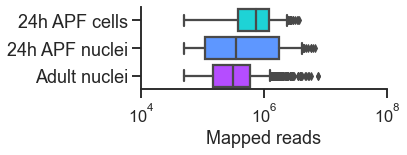

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(6,2.5))
palette = ['#1ED3D6', '#5e97ff', '#B54DFF'] # colors for point
sns.boxplot(data=[df4,df5,df6], orient = 'h', palette=palette, ax=ax, saturation=1)
ax.set_xscale('log')
ax.set_xlim(1e4, 1e8)
ax.set_xlabel("Mapped reads",size=18)
ax.set_yticklabels(["24h APF cells", "24h APF nuclei", "Adult nuclei"],size =18)
#ax.set_title("Genes ", size=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side =  ax.spines["top"]
top_side.set_visible(False)
dpi=600
plt.tight_layout()

# load log transformed reads 

In [22]:
df_nuclei = pd.read_csv('../data/htseq_ORN_nuclei_LogCPM_17plates_addintron_hq50k_neuron2-5.tab.gz',  sep="\t", header=0, index_col=0)
df_24h = pd.read_csv('../data/htseq_ORN_cell_LogCPM_10plates_hq50k_neuron2-5.tab.gz', sep="\t", header=0, index_col=0)

df_nuclei.shape, df_24h.shape

((17472, 2829), (17472, 1892))

In [23]:
df_log_CPM_all = pd.concat([df_24h, df_nuclei],  axis = 1, sort=False)

df_log_CPM_all= df_log_CPM_all.fillna(0)

print('combined (gene,cell):'), df_log_CPM_all.shape

combined (gene,cell):


(None, (17472, 4721))

In [24]:
df_log_CPM_all.head()

,ORNcell_24h_ElavCD8GFP_P1_A10,ORNcell_24h_ElavCD8GFP_P1_A11,ORNcell_24h_ElavCD8GFP_P1_A12,ORNcell_24h_ElavCD8GFP_P1_A15,ORNcell_24h_ElavCD8GFP_P1_A16,ORNcell_24h_ElavCD8GFP_P1_A17,ORNcell_24h_ElavCD8GFP_P1_A18,ORNcell_24h_ElavCD8GFP_P1_A19,ORNcell_24h_ElavCD8GFP_P1_A1,ORNcell_24h_ElavCD8GFP_P1_A20,...,ORNnuclei_adult_AM29UNC84GFP_P3_I6,ORNnuclei_adult_AM29UNC84GFP_P3_J4,ORNnuclei_adult_AM29UNC84GFP_P3_L14,ORNnuclei_adult_AM29UNC84GFP_P3_N15,ORNnuclei_adult_AM29UNC84GFP_P3_N8,ORNnuclei_adult_AM29UNC84GFP_P3_O1,ORNnuclei_adult_AM29UNC84GFP_P3_P2,ORNnuclei_adult_AM29UNC84GFP_P3_P6,ORNnuclei_adult_AM29UNC84GFP_P3_P7,ORNnuclei_adult_AM29UNC84GFP_P3_P9
symbol,,,,,,,,,,,,,,,,,,,,,
7SLRNA:CR32864,0.000000,0.953444,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,2.68672,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
a,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
abd-A,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Abd-B,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Abl,9.458788,10.285869,0.0,9.541255,7.627055,0.0,0.0,0.0,8.482902,10.318245,...,0.0,0.0,0.00000,0.0,0.0,10.899275,0.0,0.0,0.0,0.0


In [25]:
#create matricies for each time point
df_24h_cell_new = df_log_CPM_all.T.loc[ORNs_24h]
df_24h_nuclei_new = df_log_CPM_all.T.loc[ORNs_24h_nuclei]
df_adult_nuclei_new = df_log_CPM_all.T.loc[ORNs_adult]

print ('24h cell new:'), df_24h_cell_new.shape,print('24h nuclei new:'), df_24h_nuclei_new.shape, print('Adult new:'), df_adult_nuclei_new.shape

24h cell new:
24h nuclei new:
Adult new:


(None, (1198, 17472), None, (266, 17472), None, (1690, 17472))

In [26]:
df_24_cell_T = df_24h_cell_new.T
df_24_nuc_T = df_24h_nuclei_new.T
df_adult_nuc_T = df_adult_nuclei_new.T

df_24_cell_T.shape, df_24_nuc_T.shape, df_adult_nuc_T.shape

((17472, 1198), (17472, 266), (17472, 1690))

In [27]:
df1 =  df_24_cell_T[df_24_cell_T >1].count()
df2 = df_24_nuc_T[df_24_nuc_T >1].count()
df3 = df_adult_nuc_T[df_adult_nuc_T >1].count()

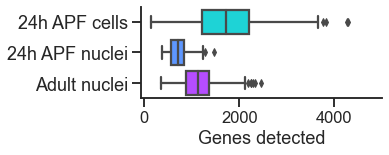

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(6,2.5))
palette = ['#1ED3D6', '#5e97ff', '#B54DFF'] # colors for boxes
sns.boxplot(data=[df1, df2,df3],orient='h', palette=palette, ax=ax, saturation=1 )
ax.set_xlim(right=5000)
ax.set_xlabel("Genes detected",size=18)
ax.set_yticklabels(["24h APF cells", "24h APF nuclei", "Adult nuclei"],size =18)
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side =  ax.spines["top"]
top_side.set_visible(False)
plt.tight_layout()

# calculate dropouts for RNs

In [33]:
dropout_threshold = 3

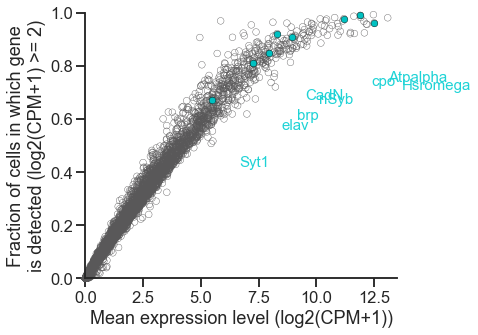

In [34]:
# What is the dropout rate of the marker genes used to filter cells in 24h data?

genes = ["elav", "brp", "Syt1", "nSyb", "CadN", 'Atpalpha', 'Hsromega', 'cpo']


dropout_rate = np.sum(df_24_cell_T >= dropout_threshold, axis=1) / df_24_cell_T.shape[1]
fig.patch.set_visible(False)
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_xlim(1, 13.5)

x = np.mean(df_24_cell_T, axis=1)
y = dropout_rate
ax.scatter(x, y, marker="o",linewidths=0.4, facecolors='none', edgecolors='#595859', s=45, clip_on=False)

x = np.mean(df_24_cell_T, axis=1).loc[genes]
y = dropout_rate.loc[genes]
ax.scatter(x, y, marker="o",linewidths=0.4, color="#00C1C1",  edgecolors='black', s=45, clip_on=False)

ax.set_xlim(left=0)
ax.set_ylim(0,1)
ax.set_xlabel("Mean expression level (log2(CPM+1))")
ax.set_ylabel("Fraction of cells in which gene\nis detected (log2(CPM+1) >= 2)")

for myX, myY, label in zip(x, y, x.index):
    ax.text(myX+1.2, myY-0.25, label, color='#1ED3D6',fontsize=15)

right_side = ax.spines["right"]
right_side.set_visible(False)
top_side =  ax.spines["top"]
top_side.set_visible(False)

plt.tight_layout()
dpi=600


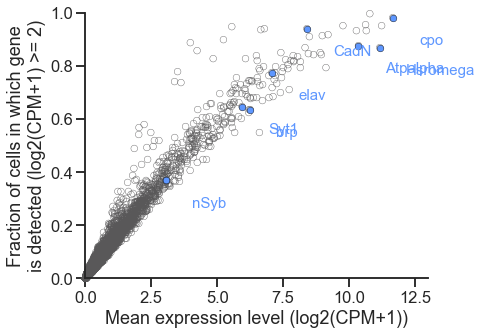

In [31]:
# What is the dropout rate of the marker genes used to filter cells in 24 nculei data?

genes = ["elav", "brp", "Syt1", "nSyb", "CadN",'Atpalpha','Hsromega', 'cpo']

dropout_rate = np.sum(df_24_nuc_T >= dropout_threshold, axis=1) / df_24_nuc_T.shape[1]

fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_xlim(1, 13)

x = np.mean(df_24_nuc_T, axis=1)
y = dropout_rate
ax.scatter(x, y, marker="o",linewidths=0.4, facecolors='none', edgecolors='#595859', s=45, clip_on=False)

x = np.mean(df_24_nuc_T, axis=1).loc[genes]
y = dropout_rate.loc[genes]
ax.scatter(x, y, marker="o",linewidths=0.4, color="#5e97ff",  edgecolors='black', s=45,clip_on=False,)

ax.set_xlim(left=0)
ax.set_ylim(0,1)
ax.set_xlabel("Mean expression level (log2(CPM+1))")
ax.set_ylabel("Fraction of cells in which gene\nis detected (log2(CPM+1) >= 2)")

for myX, myY, label in zip(x, y, x.index):
    ax.text(myX+1.0, myY-.10, label, color='#5e97ff',fontsize=15)
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side =  ax.spines["top"]
top_side.set_visible(False)
    
plt.tight_layout()
dpi=600


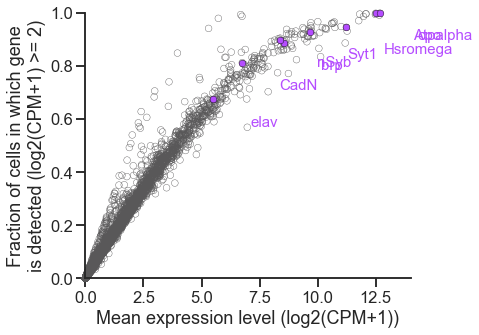

In [32]:
# What is the dropout rate of the marker genes used to filter cells in adult data?

genes = ["elav", "brp", "Syt1", "nSyb", "CadN", 'Atpalpha', 'Hsromega', 'cpo']


dropout_rate = np.sum(df_adult_nuc_T >= dropout_threshold, axis=1) / df_adult_nuc_T.shape[1]

fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_xlim(1, 14)

x = np.mean(df_adult_nuc_T, axis=1)
y = dropout_rate
ax.scatter(x, y, marker="o",linewidths=0.4, facecolors='none', edgecolors='#595859', s=45, clip_on=False)

x = np.mean(df_adult_nuc_T, axis=1).loc[genes]
y = dropout_rate.loc[genes]
ax.scatter(x, y, marker="o",linewidths=0.4, color="#B54DFF",  edgecolors='black', s=45,clip_on=False)

ax.set_xlim(left=0)
ax.set_ylim(0,1)
ax.set_xlabel("Mean expression level (log2(CPM+1))")
ax.set_ylabel("Fraction of cells in which gene\nis detected (log2(CPM+1) >= 2)")

for myX, myY, label in zip(x, y, x.index):
    ax.text(myX+1.6, myY-.10, label, color='#B54DFF',fontsize=15)
    
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side =  ax.spines["top"]
top_side.set_visible(False)

plt.tight_layout()
dpi=600

# Venn diagrams comparing genes expressed in nuclei and cells from 24h APF

In [31]:
df_log_CPM_24h = pd.concat([df_24h, df_nuclei],  axis = 1, sort=False)

df_log_CPM_24h = df_log_CPM_24h.fillna(0)

print('combined (gene,cell):'), df_log_CPM_24h.shape

combined (gene,cell):


(None, (17472, 4721))

In [32]:
df_24h_cell_new = df_log_CPM_24h.T.loc[ORNs_24h]
df_24h_nuclei_new = df_log_CPM_24h.T.loc[ORNs_24h_nuclei]


print ('24h cell new:'), df_24h_cell_new.shape
print('24h nuclei new:'), df_24h_nuclei_new.shape

24h cell new:
24h nuclei new:


(None, (266, 17472))

In [33]:
df_24_nuc_T['count']= df_24_nuc_T[df_24_nuc_T>=2].count(axis=1)
df_24_cell_T['count'] = df_24_cell_T[df_24_cell_T>=2].count(axis=1)

df_24_cell_T2 =  df_24_cell_T[df_24_cell_T['count']>1]
df_24_nuc_T2 = df_24_nuc_T[df_24_nuc_T['count']>1]
df_24_cell_T2.shape, df_24_nuc_T2.shape

((11482, 1199), (8831, 267))

In [34]:
cell_24h_unfiltered = list(df_24_cell_T2.index)
nuc_24h_unfiltered = list(df_24_nuc_T2.index)

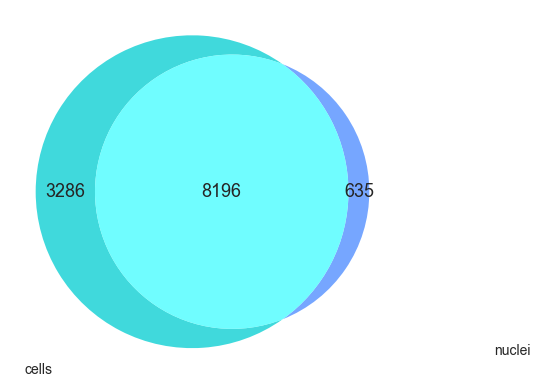

In [35]:
import matplotlib.pyplot as plt
import matplotlib_venn as venn
from matplotlib_venn import venn2

fig, ax = plt.subplots(1, 1,  figsize=(7,7))

# Second way
vd2 = venn2([set(cell_24h_unfiltered), set(nuc_24h_unfiltered)],set_labels = ('cells', 'nuclei'), set_colors=('#1ED3D6', '#5e97ff',),alpha = 0.85)

for text in vd2.set_labels:
 text.set_fontsize(14);
for text in vd2.subset_labels:
 text.set_fontsize(18)
vd2.get_label_by_id("A").set_x(-0.55)
vd2.get_label_by_id("B").set_x(1)

# GO analysis

In [37]:
def load_Flymine(infile):
    terms = []
    pvalues = []
    num_genes = []
    with open(infile) as f:
        for line in f:
            term = line.rstrip().split("\t")[0]
            pvalue = float(line.rstrip().split("\t")[1])
            n = len(line.rstrip().split("\t")[2].split(","))
            terms.append(term)
            pvalues.append(pvalue)
            num_genes.append(n)
    df = pd.DataFrame({"term":terms, "pvalue": pvalues, "num_genes": num_genes})
    df.sort_values("pvalue", inplace=True, ascending=True)
    return df

In [38]:
nuc_24 = load_Flymine("../data/Figure2/REVIGO_dev_GO.tsv")
adult_nuc = load_Flymine("../data/Figure2/REVIGO_adult_GO_noMT.tsv")

In [39]:
print('nuc_24:'), nuc_24.loc[nuc_24["pvalue"] < 1e-3].shape,
print('adult_nuc:'),adult_nuc.loc[adult_nuc["pvalue"] < 1e-3].shape

nuc_24:
adult_nuc:


(None, (22, 3))

In [40]:
num_hits = 19

Text(0.5, 0, '-log10 (p-value)')

/Users/colleenmclaughlin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65279 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/colleenmclaughlin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65279 missing from current font.
  font.set_text(s, 0, flags=flags)


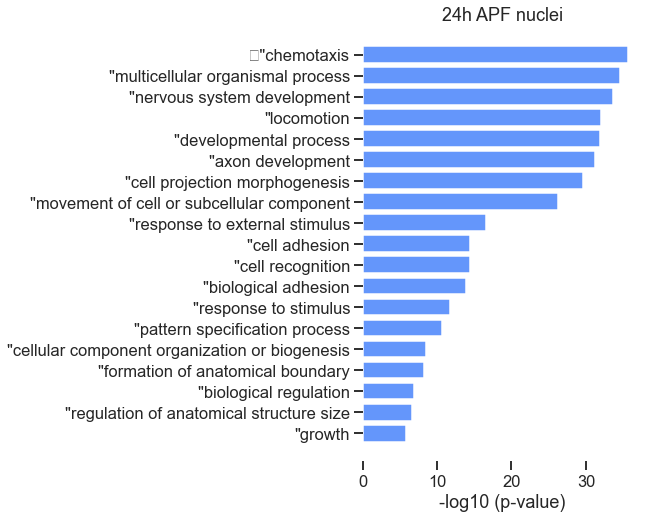

In [41]:
# P values, acj6pos
myData = nuc_24.head(n=num_hits)[::-1]
x = np.array(range(myData.shape[0]))
y = -np.log10(myData["pvalue"])
xticklabels = list(myData["term"])

fig, ax = plt.subplots(1, 1,  figsize=(5,8))
ax.barh(x, y, color='#6496FB')
ax.set_title('24h APF nuclei')
ax.set_yticks(x)
ax.set_yticklabels(xticklabels)
ax.set(frame_on=False) 
ax.set_xlabel("-log10 (p-value)")

Text(0.5, 0, '-log10 (p-value)')

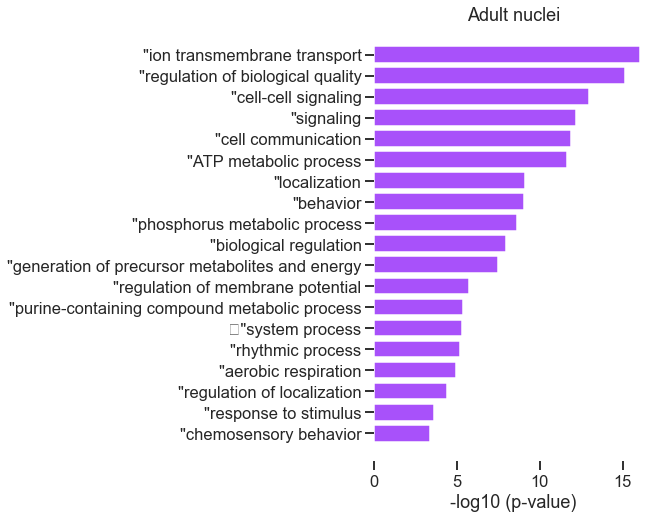

In [42]:
# P values, acj6pos
myData = adult_nuc.head(n=num_hits)[::-1]
x = np.array(range(myData.shape[0]))
y = -np.log10(myData["pvalue"])
xticklabels = list(myData["term"])

fig, ax = plt.subplots(1, 1,  figsize=(5,8))
ax.barh(x, y, color="#A851FA")
ax.set_title('Adult nuclei')
ax.set_yticks(x)
ax.set_yticklabels(xticklabels)
ax.set(frame_on=False) 
ax.set_xlabel("-log10 (p-value)")

# comparison of adult PN cells and nuclei

In [43]:
names_nuc = []
with open ('../data/PNs/VT_adult_nuc_combined_names_313_50k_2-5.txt') as f:
    for line in f:
        names_nuc.append(line.rstrip())
        
names_cell = []
with open ('../data/PNs/GH146_adult_cell_names_369_50k_2-5.txt') as f:
    for line in f:
        names_cell.append(line.rstrip())

In [44]:
df_nuc = pd.read_csv('../data/PNs/Adult_nuc_rawreads_combined_exon_intron_htseq.csv', index_col=0, header=0)

In [45]:
#nuclei combined  raw reads 
nuc_combo = [x for x in list(df_nuc.columns) if  x in names_nuc]
print('Combined nuclei:'), len(nuc_combo)


Combined nuclei:


(None, 313)

In [46]:
df_raw_nuc_combo =  df_nuc[list(nuc_combo)]
df_raw_nuc_combo.shape

(17472, 313)

In [47]:
df_intron = pd.read_csv('../data/PNs/allNUCs_PNs_VT_Adult_rawreads_htseq_intron.csv', header=0, index_col=0)
df_exon = pd.read_csv('../data/PNs/allNUCs_PNs_VT_Adult_rawreads_htseq_exon.csv', index_col= 0, header= 0)
df_intron.shape, df_exon.shape

((12577, 384), (17472, 384))

In [48]:
#nuclei introns  and exons raw reads

nuc_intron = [x for x in list(df_intron.columns) if x in names_nuc]
nuc_exon = [x for x in list(df_exon.columns) if x in names_nuc]

len(nuc_intron), len(nuc_exon)

(313, 313)

In [49]:
df_raw_nuc_intron = df_intron[list(nuc_intron)]
df_raw_nuc_exon = df_exon[list(nuc_exon)]

df_raw_nuc_intron.shape, df_raw_nuc_exon.shape

((12577, 313), (17472, 313))

In [50]:
df_cell = pd.read_csv('../data/PNs/allCELLS_PNs_GH146_Adult_rawreads_htseq_exon.csv', header= 0 , index_col=0)

In [51]:
#cell raw reads

cell_PN = [x for x in list(df_cell.columns) if x in names_cell]
len(cell_PN)

369

In [52]:
df_raw_cell = df_cell[list(cell_PN)]

df_raw_cell.shape

(17472, 369)

In [53]:
# plot read disribution of all conditions (cell, nuc exon only, nuc combined)

df10 = df_raw_cell[df_raw_cell >=1].sum(axis=0)
df11 = df_raw_nuc_combo[df_raw_nuc_combo>-1].sum(axis=0)

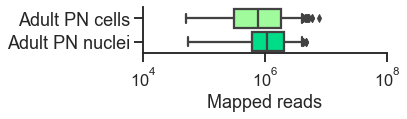

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(6,2))
palette = ['#a0fb9c', '#00dd88',] # colors for bars
sns.boxplot(data=[df10, df11], orient = 'h', palette=palette, ax=ax, saturation=1)
ax.set_xscale('log')
ax.set_xlim(1e4, 1e8)
ax.set_xlabel("Mapped reads",size=18)
ax.set_yticklabels(["Adult PN cells","Adult PN nuclei", "Adult PN nuclei (exon)",],size =18)
#ax.set_title("Genes ", size=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side =  ax.spines["top"]
top_side.set_visible(False)
dpi=600
plt.tight_layout()


# create matrices of log transformed PN data

In [56]:
df_logCPM_cell = pd.read_csv('../data/PNs/htseq_adult_GH146_PNs_all_exonic_logCPM.csv', header=0, index_col=0)
df_logCPM_nuc = pd.read_csv('../data/PNs/htseq_PNs_adult_combined_logCPM.csv', header=0, index_col=0)

In [57]:
logCPM_cell = [x for x in list(df_logCPM_cell.columns) if x in names_cell]
logCPM_nuc = [x for x in list(df_logCPM_nuc.columns) if x in names_nuc]

len(logCPM_cell), len(logCPM_nuc )

(369, 313)

In [58]:
df_logCPM_cell = df_logCPM_cell[list(logCPM_cell)]
df_logCPM_nuc = df_logCPM_nuc[list(logCPM_nuc)]

df_logCPM_cell.shape, df_logCPM_nuc.shape

((17472, 369), (17472, 313))

In [59]:
df7 = df_logCPM_cell[df_logCPM_cell>1].count(axis=0)
df8 = df_logCPM_nuc[df_logCPM_nuc >1].count(axis=0)


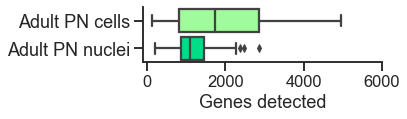

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(6,2))
palette = ['#a0fb9c', '#00dd88',] # colors for bars
sns.boxplot(data=[df7, df8, ], orient = 'h', palette=palette, ax=ax, saturation=1)
ax.set_xlim(right=6000)
ax.set_xlabel("Genes detected",size=18)
ax.set_yticklabels(["Adult PN cells","Adult PN nuclei",],size =18)
#ax.set_title("Genes ", size=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side =  ax.spines["top"]
top_side.set_visible(False)
dpi=600
plt.tight_layout()

In [61]:
dropout_threshold =  3

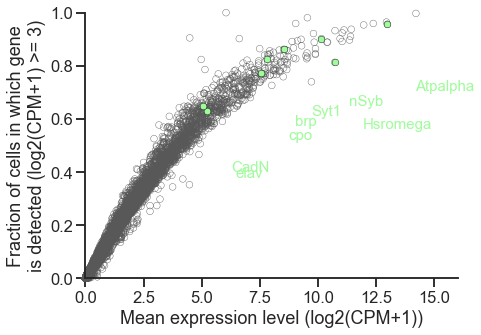

In [62]:
genes = ["elav", "brp", "Syt1", "nSyb", "CadN", 'Atpalpha', 'Hsromega', 'cpo']

dropout_rate = np.sum(df_logCPM_cell >= dropout_threshold, axis=1) / df_logCPM_cell.shape[1]
fig.patch.set_visible(False)
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_xlim(1, 16)

x = np.mean(df_logCPM_cell, axis=1)
y = dropout_rate
ax.scatter(x, y, marker="o",linewidths=0.4, facecolors='none', edgecolors='#595859', s=45, clip_on=False)

x = np.mean(df_logCPM_cell, axis=1).loc[genes]
y = dropout_rate.loc[genes]
ax.scatter(x, y, marker="o",linewidths=0.4, color='#a0fb9c',  edgecolors='black', s=45, clip_on=False)

ax.set_xlim(left=0)
ax.set_ylim(0,1)
ax.set_xlabel("Mean expression level (log2(CPM+1))")
ax.set_ylabel("Fraction of cells in which gene\nis detected (log2(CPM+1) >= 3)")

for myX, myY, label in zip(x, y, x.index):
    ax.text(myX+1.2, myY-0.25, label, color='#a0fb9c',fontsize=15)

right_side = ax.spines["right"]
right_side.set_visible(False)
top_side =  ax.spines["top"]
top_side.set_visible(False)

plt.tight_layout()
dpi=600

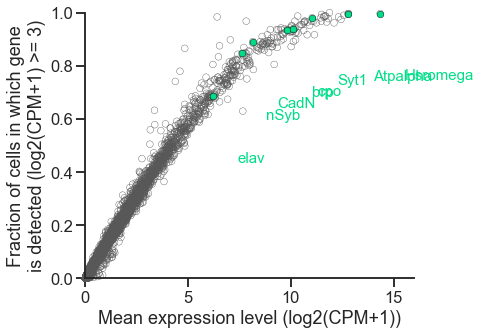

In [63]:
genes = ["elav", "brp", "Syt1", "nSyb", "CadN", 'Atpalpha', 'Hsromega', 'cpo']

dropout_rate = np.sum(df_logCPM_nuc >= dropout_threshold, axis=1) / df_logCPM_nuc.shape[1]
fig.patch.set_visible(False)
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_xlim(1, 16)

x = np.mean(df_logCPM_nuc, axis=1)
y = dropout_rate
ax.scatter(x, y, marker="o",linewidths=0.4, facecolors='none', edgecolors='#595859', s=45, clip_on=False)

x = np.mean(df_logCPM_nuc, axis=1).loc[genes]
y = dropout_rate.loc[genes]
ax.scatter(x, y, marker="o",linewidths=0.4, color='#00dd88',  edgecolors='black', s=45, clip_on=False)

ax.set_xlim(left=0)
ax.set_ylim(0,1)
ax.set_xlabel("Mean expression level (log2(CPM+1))")
ax.set_ylabel("Fraction of cells in which gene\nis detected (log2(CPM+1) >= 3)")

for myX, myY, label in zip(x, y, x.index):
    ax.text(myX+1.2, myY-0.25, label, color='#00dd88',fontsize=15)

right_side = ax.spines["right"]
right_side.set_visible(False)
top_side =  ax.spines["top"]
top_side.set_visible(False), 
plt.tight_layout()
dpi=600

# create venn diagram comparing genes detected in PN nucs and cells


In [64]:
df_logCPM_cell_1 =  df_logCPM_cell
df_logCPM_nuc_1 = df_logCPM_nuc

df_logCPM_cell_1['count'] = df_logCPM_cell_1[df_logCPM_cell_1 >=2].count(axis=1)
df_logCPM_nuc_1['count'] = df_logCPM_nuc_1[df_logCPM_nuc_1 >=2].count(axis=1)

df_logCPM_cell_2 = df_logCPM_cell_1[df_logCPM_cell_1['count'] >1]
df_logCPM_nuc_2 =  df_logCPM_nuc_1[df_logCPM_nuc_1['count'] >1]

cell = list(df_logCPM_cell_2.index)
nuc =  list(df_logCPM_nuc_2.index)

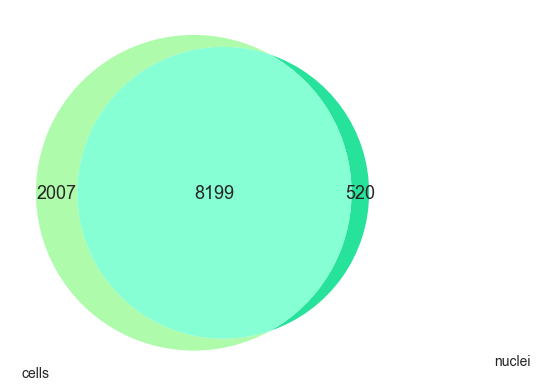

In [65]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

fig, ax = plt.subplots(1, 1,  figsize=(7,7))

# Second way
vd2 = venn2([set(cell), set(nuc)],set_labels = ('cells', 'nuclei'), set_colors=('#a0fb9c', '#00dd88'),alpha = 0.85)

for text in vd2.set_labels:
 text.set_fontsize(14);
for text in vd2.subset_labels:
 text.set_fontsize(18)
vd2.get_label_by_id("A").set_x(-0.55)
vd2.get_label_by_id("B").set_x(1)